In [1]:
# Initial setup. Just run this cell once.
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Information Theory (10 points)

In this part of the assignment, we explore a few basic concepts from information theory:

* Mutual Information
* Entropy
* Cross-Entropy
* KL Divergence

You may have encountered several of these concepts in machine learning classes you've taken.  For similar reasons, they are important in NLP. We'll discuss them throughout the semester as they appear, but it is worth quickly going through the definitions once up front so they are fresh in your mind!

Answer the questions below as you encounter them. There are a lot of questions, but almost all answers should be very short (less than one line).

Before we get started into information theory, let's briefly review expected values.  That version of a weighted mean features heavily in the definitions of entropy and cross-entropy, so make sure you're comfortable with it before continuing on.

## 0. Expected value

[Expected value](https://en.wikipedia.org/wiki/Expected_value) is a weighted average.  In particular, it is the average outcome of an experiment, weighted by how often each outcome occurs.

As a concrete example, imagine each time you play a game one of the following happens:
- You win \$20.
- You win \$30.
- You lose \$20.

On the surface, it appears that, on average, you win $\frac{20 + 30 - 20}{3} = \$10$ each time you play.

Very tempting!

However, this makes an assumption that all three outcomes are equally likely.  The game gets considerably less favorable if you lose 99% of the time and only $\frac{1}{2}$% of the time do you end up in either of the winning cases.

To compute the average in this new, less favorable situation, we need to use a weighted average.  That is, we need to find the average of the values of the outcomes _weighted by the probability_ of that outcome.

The formula for this weighted average is:

$$E[x] = \sum_{i=1}^{n} x_i P(x_i)$$

That is, summing over all $n$ outcomes, add the product of the value of that outcome $x_i$ and the probability you might find yourself there (i.e. the weight, $P(x_i)$).

### Part 0(a)
1. What is the expected value of the less favorable game?  (Hint: since you're losing \$20 most of the time and you don't win a whole lot of money even when you do win, you should expect the expected value to be close to -\$20.)

### Answers for Part 0(a)

**Do not write more than a couple of words for each answer!** These should be very short.

In [2]:
from __future__ import print_function
import pandas as pd
def exp_prob_lotto():
    # weights
    a, b, c = 20, 30, -20
    # probabilities
    x, y, z = 0.005, 0.005, 0.99
    return sum([a*x, b*y, c*z])
print('Expected Probability of Playing:', exp_prob_lotto())

Expected Probability of Playing: -19.55


## 1. Pointwise Mutual Information

[Pointwise Mutual Information (PMI)](https://en.wikipedia.org/wiki/Pointwise_mutual_information) is a measure of how much knowing one outcome tells you about another.

For example:  if I tell you it's raining, you'd probably guess it's cloudy.  But if I told you one die rolled 6, you couldn't guess what the other die rolled. Applied to language, if you mention the word "rain", I learn that you're more likely to also say "wet" or "umbrella" in the same context.

The formula for PMI is as follows:

$$\text{PMI}(x, y) = \log_2\frac{p(x, y)}{p(x)\ p(y)}$$

In short, it measures the chance two outcomes tend to co-occur (the numerator) relative to the chance they would co-occur if they were independent events (the denominator). The $\log_2$ makes it easier to reason about very large or very small values of this ratio - and let's us give it a unit: bits. We'll explain more about this in Part 2.

"Point-wise" refers to the fact that we're picking single outcomes for "x" and "y" (i.e. x = "raining", y = "cloudy").  Without the point-wise (i.e. just ["mutual information"](https://en.wikipedia.org/wiki/Mutual_information)) refers to the average (expected value) point-wise mutual information between all possible assignments to x and y.

### Questions 1(a)

1. What is the value of PMI when x and y are independent events?  When is PMI higher?  Lower?
2. If $P(\text{rainy}, \text{cloudy})= 0.1$, $P(\text{rainy}) = 0.2$ and $P(\text{cloudy}) = 0.8$, what is $\text{PMI}(\text{rainy}, \text{cloudy})$?
3. Imagine $x$ is some word in a sentence, and $y$ is the next word in the sentence.  Imagine $P(\text{washington})=0.01$, $P(\text{post}) = 0.01$, and $P(\text{washington}, \text{post}) = 0.002$.  What is $\text{PMI}(\text{washington}, \text{post})$?  Speculate why this kind of metric might be useful.

### Answers for Part 1(a)

**Do not write more than a couple of words for each answer!** These should be very short.

In [3]:
print('#1.')
print('if x & y are independent, p(x,y) = p(x)p(y), so PMI =', np.log2(1))

print('#2.')
print('PMI(rainy, cloudy) = ', np.log2(0.1/(0.2*0.8)))

print('#3.')
print('PMI(washington, post) =', np.log2(0.002/(0.01*0.01)))
print('''
This metric might be useful because it tells us the combination 
of the two probabilities together is higher than independently (0).
A really high PMI for two words would then tell us that if we see 
one of the two words in a text we should expect to see the other word
or infer that missing word's meaning.
''')

#1.
if x & y are independent, p(x,y) = p(x)p(y), so PMI = 0.0
#2.
PMI(rainy, cloudy) =  -0.678071905113
#3.
PMI(washington, post) = 4.32192809489

This metric might be useful because it tells us the combination 
of the two probabilities together is higher than independently (0).
A really high PMI for two words would then tell us that if we see 
one of the two words in a text we should expect to see the other word
or infer that missing word's meaning.



## 2. Entropy

[Entropy (Shannon entropy)](https://en.wikipedia.org/wiki/Shannon_entropy) is a notion of how "uncertain" the outcome of some experiment is.  The more uncertain - or the more spread out the distribution - the higher the entropy. *(Aside: some of you may have encountered "entropy" in a thermodynamics class.  Entropy as we're defining it here is conceptually similar - a notion of the amount of disorder in a system, and the concepts are closely related.)*

Mathematically, for a (discrete) random variable $X$,

$$\text{Entropy}(X) = H(X) = -\Sigma_x\ p(x) \log_2 p(x)$$

*(We take $0 \times log_2(0) = 0$, although in the "real world" probabilities are rarely equal to 0.)*

Or, in English: imagine you have some probability distribution over a discrete set of events $X$.  Loop over each event and take the product of the probability of that event and the base-2 log of the probability.  Or, put another way, find the expected value $E[\log_2 p(x)]$ for this probability distribution.

You have to admit, it's a bit of an odd calculation if you've never seen it before.  Why $\log_2$?  Why is there a negative sign?

Before we explain exactly what's going on, let's play with the equation a little.

Let's compute the entropy of the result of a coin flip whose probability of heads is $P(\text{heads}) = p$

In [4]:
def XLogX(x):
    """Returns x * log2(x)."""
    return np.nan_to_num(x * np.log2(x))

def BinaryEntropy(p):
    """Compute the entropy of a coin toss with P(heads) = p."""
    #### YOUR CODE HERE
    # Hint: remember a coin flip has two possible outcomes, heads and tails.
    # Hint: Use XLogX above to take care of the 0 * log2(0) case!
    return np.negative(np.sum([XLogX(p), XLogX(1-p)]))
    #### END YOUR CODE
    pass

# Let's try running it for p = 0.  This means the coin always comes up "tails".
# We expect that the entropy of this is 0 as there is no uncertainty about the outcome.
assert 0.0 == BinaryEntropy(0)

# We expect p = 0.5 to be as uncertain as it gets.  There's no good prior guess
# as to which of heads or tails the coin is going to come down on.
# As a result, we expect this to be bigger than p=0 above, but also bigger than any
# other value of p.
assert BinaryEntropy(0.5) > BinaryEntropy(0)
assert BinaryEntropy(0.5) > BinaryEntropy(0.49)
assert BinaryEntropy(0.5) > BinaryEntropy(0.51)

# As it turns out the entropy at p=0.5 is 1.0.
assert 1.0 == BinaryEntropy(0.5)

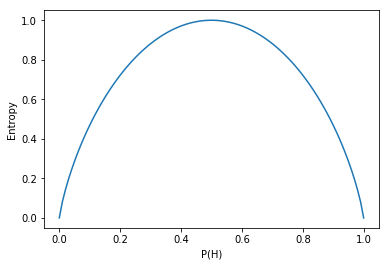

In [5]:
# Poking at a couple of individual values is interesting, but we can also simply plot
# entropy for all possibly values of P(H).
# As expected, the curve is maximum at p = 0.5 when the outcome is most uncertain
# and decreases to 0 as either heads or tails becomes a certainty.

p_of_heads = np.arange(0, 1.01, 0.01);
# plt.plot(p_of_heads, BinaryEntropy(p_of_heads))
plt.plot(p_of_heads, [BinaryEntropy(p) for p in p_of_heads])
plt.xlabel('P(H)')
plt.ylabel('Entropy')

For a binary variable $x \in \{0,1\}$ like our coin flip, the maximum entropy happens to be $H(X) = 1.0$. But don't be fooled by this - entropy is only bounded below (by 0), and can be arbitrarily large. We'll see this below.

## Interpreting Entropy

There are a few interpretations of entropy.  The one we'll use through the rest of this document is the idea of sending a message to your friend.

Imagine you want to send one of two messages to your friend, message **A** or message **B**.  You are going to assign each message to a sequence of bits you're going to put "on the wire".  Imagine sending **A** and **B** were equally likely.  That is $P(A) = P(B) = 0.5$.

### Part 2(b): Message Passing
Answer the following questions in the markdown cell below.

1. What bit pattern might you want to assign to message **A**?  **B**?  (Hint: there's no unique right answer here, but try to use as few bits as possible - i.e. one of the two "obvious" solutions.) How many bits did you use?

2. What is the entropy of the probability distribution over the messages?

3. Say you were going to pick a message at random to send, what is expected number of bits you'd need to send?  (Hint: this question is "trivial"/minimal in this case, but it will re-appear below!)

### Answers for Part 2(b)

**Do not write more than a couple of words for each answer!** These should be very short.

1. 0 & 1
2. 0.5(1) + 0.5(1) = 1
3. 2**n

Now imagine you want to send one of three messages:

- **A** with $P(A) = 0.5$
- **B** with $P(B) = 0.25$
- **C** with $P(C) = 0.25$

Again, we're going to assign bit patterns to each of these three messages.

### Part 2(c): Longer Messages
Answer the following questions in the markdown cell below.

1. Given you are sending **A** more often and you prefer shorter encodings on average, should **A** have a longer or shorter bit pattern than **B**?  **C**?
2. What is one bit pattern you could assign to the messages?  (Hint: again, there's no unique solution here, but do try to find an assignment that uses the fewest number of bits on average.) How many bits did you use for each message?
3. What is $-\log_2 p(x)$ for each message $x$? Compare this to the number of bits you answered in the previous question.
4. What is the entropy of this distribution?
5. What is the expected value of the number of bits you are sending? Compare with your answer to the previous question.
6. What if you had 128 messages, each with a probability of 1/128?  What's the expected number of bits?  What about entropy? What about 1024 messages each with probability 1/1024?

### Answers for Part 2(c)

**Do not write more than a couple of words for each answer!** These should be very short.

In [12]:
# 1. Shorter than B or C
# 2. 0, 10, 11
# 3. 0.5*1 + 0.25*2 + 0.25*2 = 1.5, which is higher than 1 before
# 4. 
print(-1*(XLogX(0.5) + XLogX(0.25) + XLogX(0.25)))
# 5. 0.5 for each, same as before
# 6. 
print('128 messages would require 7 bits as 2^7 = 128', 2**7 == 128)
print('1024 messages would require 10 bits as 2^10 = 1024', 2**10 == 1024)

1.5
128 messages would require 7 bits as 2^7 = 128 True
1024 messages would require 10 bits as 2^10 = 1024 True


In short, entropy is the average number of bits per message going across the wire given that you optimally designed your encoding scheme. It turns out that, according to [Shannon's source coding theorem](https://en.wikipedia.org/wiki/Shannon%27s_source_coding_theorem), $- \log_2 p(x)$ is the optimal number of bits to use for a message in the general case.  This shouldn't be surprising given your answers above!

From your last two questions above, also notice that as the uncertainty of which message might be sent gets higher and higher - more and more messages each with the same, but dwindling probability - the higher the number of bits we need and the higher the entropy.

## 3. Cross Entropy

To recap above, we said that when we perform the following steps...

1.  Construct an optimal encoding of messages knowing $P(X)$
2.  Send a message sampled from the probability distribution $P(X)$

...we discovered above that $\text{Entropy}(X)$ is the expected number of bits we'll need to send over the wire, averaged over all possible messages. (Or equivalently, a large number of samples.)

But what if we were wrong when designing the code?  What if we mistakenly thought $Q(X)$ was the probability distribution when we designed the code?  Then our steps would look like this:

1.  Construct an optimal encoding of messages knowing **$Q(X)$**, such that $x$ is encoded with $-\log_2 Q(x)$ bits.
2.  Send a message sampled with the probability distribution $P(X)$

### Part 3(a): [Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy)

1. Given you designed the optimal code for the wrong distribution, would you expect that you'd actually end up putting more or fewer bits on the wire than you would have if you'd known the correct probability distribution over messages you might send?
2. Write the expected value for the number of bits you'd put on the wire in the case where you send messages with probability $P(X)$ but designed an optimal code with $Q(X)$.  *(Hint: it's very similar in form to the equation for entropy, $H(X) = - \sum_x P(x) \log_2 P(x)$.)*

### Answers for Part 3(a)

**Do not write more than a couple of words for each answer!** These should be very short.

1. Best case scenario would be the same, so more often than not would be more bits.
2. $H(X) = - \sum_x P(x) \log_2 Q(x)$

Congratulations, you have derived the equation for $\text{CrossEntropy}(P, Q)$.

One final observation: the closer the distributions P and Q are to one another, the closer cross entropy will be to the entropy calculation you did above.  The more they differ, the bigger cross entropy will be (and the bigger the penalty for optimizing for the wrong probability distribution).  This line of thinking naturally brings us to KL Divergence...

But hold that thought for a second, and let's connect this to Machine Learning.

### Part 3(b): Cross-Entropy in Machine Learning

You may have encountered cross entropy in a machine learning class as the loss function (e.g. logistic regression or other classification problems).

For the following questions, imagine you have a classification problem over four labels, $\{0,1,2,3\}$.  For some example $x_i$, the correct label is class $0$.  That is, our true distribution is $y_i = P(y\ |\ x_i) = [1, 0, 0, 0]$.  Your model generates this probability distribution over the classes: $\hat{y}_i = \hat{P}(y\ |\ x_i) = [0.8, 0.1, 0.05, 0.05]$.

1.  Compute $\text{CrossEntropy}(y, \hat{y})$.
2.  When the label vector is "one-hot" as it is in this case (i.e. only a single category has any probability mass), do you actually need to compute everything?  Describe the simplification.
3.  What would $\text{CrossEntropy}(y, \hat{y})$ be if your model assigned all probability mass to the correct class (class 0)? (i.e. if $\hat{y}_i = y_i = [1, 0, 0, 0]$)
4.  What if the model assigned all probability mass to class 1 instead?
5.  What if the model assigned $\frac{1}{3}$ to each of classes 2, 3, and 4, and zero to class 0?

### Answers for Part 3(b)

**Do not write more than a couple of words for each answer!** These should be very short.

In [29]:
print('1.', (-1*np.log2(0.8) - 0*np.log2(0.1) - 0*np.log2(0.05) - 0*np.log2(0.05)))
print('2.', 'No, you only need to calculate the true value since the rest -> 0.')
print('3.', 0)
print('4.', (0 - 0*np.log2(1) - 0 - 0))
print('5.', (np.nan_to_num(-1*np.log2(0)) \
             - 0*np.log2(1/3.0) - 0*np.log2(1/3.0) - 0*np.log2(1/3.0)))

1. 0.321928094887
2. No, you only need to calculate the true value since the rest -> 0.
3. 0
4. 0.0
5. 1.79769313486e+308


**Aside:** In the questions above, we dealt with $\text{CrossEntropy}(y, \hat{y})$ for a single example - and so both the true distribution $y_i = P(y\ |\ x_i)$ and the predicted one $\hat{y}_i = \hat{P}(y\ |\ x_i)$ are conditional distributions. Since cross-entropy is, like entropy, measured in bits, it becomes perfectly reasonable to do what we (almost always) do and average this over many different samples $x$ (i.e. our test set). Then the average cross-entropy loss (our test loss) will be the average number of bits needed to explain our test labels.

## 4. KL Divergence

We learned that we use the word "cross-entropy" to refer to the average number of bits we need if we design our code with $Q(X)$ (i.e. our model) in mind but end up sending with probability $P(X)$ (i.e. the test set).  Similarly, "entropy" is the average bits we need if we design with the right distribution in mind.

We don't yet have a name for the difference between these quantities (i.e. the size of the *penalty* for using the wrong distribution to optimize our code).  That difference is known as the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence), or KL divergence for short.

It is a measure of how different two probability distributions are.  The more $Q$ differs from $P$, the worse the penalty would be, and thus the higher the KL divergence.

That is,
$$ D_{KL}(P\ ||\ Q) = CE(P, Q) - H(P)$$

### Part 4(a)
1. Using the same label and prediction as 3(b), find $D_{KL}(y\ ||\ \hat{y})$.  Compare it to your answer in 3(b).  Why is this the case?  (Values from above, copied here for convenience: $y = [1, 0, 0, 0]$, $\hat{y} = [0.8, 0.1, 0.05, 0.05]$)

### Answers for Part 4(a)

**Do not write more than a couple of words for each answer!** These should be very short.

In [32]:
# 1.
ce = (-1*np.log2(0.8) - 0*np.log2(0.1) - 0*np.log2(0.05) - 0*np.log2(0.05))
hp = XLogX(1)
print('CE(P,Q) =', ce)
print('H(P) =', hp)
print('Dkl(P||Q) =', ce - hp)

CE(P,Q) = 0.321928094887
H(P) = 0.0
Dkl(P||Q) = 0.321928094887


From a machine learning perspective, the KL divergence measures the "avoidable" error - when our model is perfect (i.e. the *distribution* $\hat{P}(y\ |\ x_i) = P(y\ |\ x_i)$, the KL divergence goes to zero. In general, the cross-entropy loss - and prediction accuracy - will not be zero, but will be equal to the entropy $H(P)$. This "unavoidable" error is the [Bayes error rate](https://en.wikipedia.org/wiki/Bayes_error_rate) for the underlying task.

One final observation:  cross-entropy is not symmetric (think about how $P$ and $Q$ appear in the formula to understand why).  As a result KL Divergence isn't symmetric either (if you want to prove this to yourself substitute in for CE and E in the equation above and simplify).  So while KL divergence is a measure of similarity, it's useful to keep in mind that $D_{KL}(P\ ||\ Q) \ne D_{KL}(Q\ ||\ P)$.

# Next...

You're going to train a deep neural network! Head to [the TensorFlow notebook](../tensorflow/fun_with_tensorflow.ipynb) and follow the instructions to proceed.